<a href="https://colab.research.google.com/github/ikramooe/DataScience-1/blob/master/Titanic_Survival.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded = files.upload()
uploaded2 = files.upload()


Saving train.csv to train.csv


Saving test.csv to test.csv


In [0]:
import seaborn as sns 
import io
import pandas as pd
train_data = pd.read_csv(io.BytesIO(uploaded['train.csv']))
test_data=pd.read_csv(io.BytesIO(uploaded2['test.csv']))


So let's see what we're dealing with 

In [3]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


we notice that PassengerId is not needed as an input to our model 
sex is written as male and female   and we need numeric values  ticket also  cabin embarked  name 

In [0]:
train_data=train_data.drop('PassengerId',axis=1)
#train_data=train_data.drop('Cabin',axis=1)
train_data=train_data.drop('Ticket',axis=1)
#train_data=train_data.drop('Name',axis=1)

test_data=test_data.drop('PassengerId',axis=1)
#test_data=test_data.drop('Cabin',axis=1)
test_data=test_data.drop('Ticket',axis=1)
#test_data=test_data.drop('Name',axis=1)




In [5]:
train_data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


from the describtion we notice that data normalization is needed max value of PassengerId is 891 whereas max value of Pclass  is 3

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Name        891 non-null object
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Fare        891 non-null float64
Cabin       204 non-null object
Embarked    889 non-null object
dtypes: float64(2), int64(4), object(4)
memory usage: 69.7+ KB
      Age  Survived
0    0.42  1.000000
9    5.00  1.000000
79  63.00  1.000000
68  53.00  1.000000
1    0.67  1.000000
17  13.00  1.000000
16  12.00  1.000000
87  80.00  1.000000
2    0.75  1.000000
4    0.92  1.000000
3    0.83  1.000000
7    3.00  0.833333
20  15.00  0.800000
5    1.00  0.714286
8    4.00  0.700000
10   6.00  0.666667
63  48.00  0.666667
64  49.00  0.666667
47  35.00  0.611111
35  27.00  0.611111
74  58.00  0.600000
31  24.00  0.500000
65  50.00  0.500000
70  55.00  0.500000
72  56.00  0.5

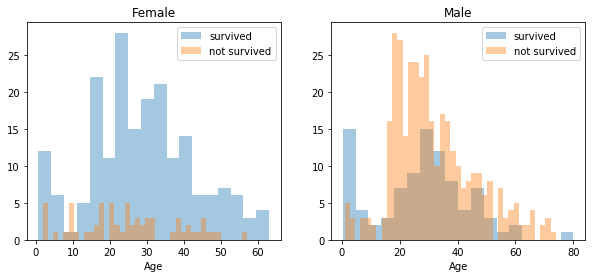

In [6]:
import matplotlib.pyplot as plt
total = train_data.isnull().sum().sort_values(ascending=False)
percent_1 = train_data.isnull().sum()/train_data.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%'])
missing_data.head(8)

train_data.info()
train_data.head()




survived = 'survived'
not_survived = 'not survived'
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(10, 4))
women = train_data[train_data['Sex']=='female']
men = train_data[train_data['Sex']=='male']
ax = sns.distplot(women[women['Survived']==1].Age.dropna(), bins=18, label = survived, ax = axes[0], kde =False)
ax = sns.distplot(women[women['Survived']==0].Age.dropna(), bins=40, label = not_survived, ax = axes[0], kde =False)
ax.legend()
ax.set_title('Female')
ax = sns.distplot(men[men['Survived']==1].Age.dropna(), bins=18, label = survived, ax = axes[1], kde = False)
ax = sns.distplot(men[men['Survived']==0].Age.dropna(), bins=40, label = not_survived, ax = axes[1], kde = False)
ax.legend()
ax.set_title('Male')





print(train_data[['Age','Survived']].groupby(['Age']  , as_index=False).mean().sort_values(by='Survived' , ascending=False))
print(train_data[['Fare','Survived']].groupby(['Fare']  , as_index=False).mean().sort_values(by='Survived' , ascending=False))
print(train_data[['SibSp','Survived']].groupby(['SibSp']  , as_index=False).mean().sort_values(by='Survived' , ascending=False))
print(train_data[['Parch','Survived']].groupby(['Parch']  , as_index=False).mean().sort_values(by='Survived' , ascending=False))
print(train_data[['Pclass','Survived']].groupby(['Pclass']  , as_index=False).mean().sort_values(by='Survived' , ascending=False))
#print(train_data[['Pclass','Survived']].groupby(['Pclass']  , as_index=False).mean().sort_values(by='Survived' , ascending=False))



[0] he omitted li moraha   1 li 9belha

In [7]:

train_data['Name']=train_data['Name'].map(lambda x : x.split(',')[1].split('.')[0].strip())
test_data['Name']=test_data['Name'].map(lambda x : x.split(',')[1].split('.')[0].strip())

Names = train_data['Name'].unique()
Names

train_data['Name'] = train_data['Name'].replace(['Lady', 'Countess','Capt', 'Col',\
 	'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

train_data['Name'] = train_data['Name'].replace('Mlle', 'Miss')
train_data['Name'] = train_data['Name'].replace('Ms', 'Miss')
train_data['Name'] = train_data['Name'].replace('Mme', 'Mrs')
    
  
test_data['Name'] = test_data['Name'].replace(['Lady', 'Countess','Capt', 'Col',\
 	'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

test_data['Name'] = test_data['Name'].replace('Mlle', 'Miss')
test_data['Name'] = test_data['Name'].replace('Ms', 'Miss')
test_data['Name'] = test_data['Name'].replace('Mme', 'Mrs')



import re
deck = {"A": 1, "B": 2, "C": 3, "D": 4, "E": 5, "F": 6, "G": 7, "U": 8}
data = [train_data, test_data]

for dataset in data:
    dataset['Cabin'] = dataset['Cabin'].fillna("U0")
    dataset['Deck'] = dataset['Cabin'].map(lambda x: re.compile("([a-zA-Z]+)").search(x).group())
    dataset['Deck'] = dataset['Deck'].map(deck)
    dataset['Deck'] = dataset['Deck'].fillna(0)
    dataset['Deck'] = dataset['Deck'].astype(int)
# we can now drop the cabin feature
train_data = train_data.drop(['Cabin'], axis=1)
test_data = test_data.drop(['Cabin'], axis=1)
  
#test_data[['Name', 'Survived']].groupby(['Title'], as_index=False).mean()

#print(train_data[['Name','Survived']].groupby(['Name'],as_index=False).mean())
train_data.head(50)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Deck
0,0,3,Mr,male,22.0,1,0,7.2500,S,8
1,1,1,Mrs,female,38.0,1,0,71.2833,C,3
2,1,3,Miss,female,26.0,0,0,7.9250,S,8
3,1,1,Mrs,female,35.0,1,0,53.1000,S,3
4,0,3,Mr,male,35.0,0,0,8.0500,S,8
5,0,3,Mr,male,NaN,0,0,8.4583,Q,8
6,0,1,Mr,male,54.0,0,0,51.8625,S,5
7,0,3,Master,male,2.0,3,1,21.0750,S,8
8,1,3,Mrs,female,27.0,0,2,11.1333,S,8
9,1,2,Mrs,female,14.0,1,0,30.0708,C,8


In [8]:
train_data['Embarked'].fillna("S",inplace=True)
#train_data['Cabin'].fillna("B96 B98",inplace=True)

test_data['Embarked'].fillna("S",inplace=True)

#for index , row in train_data.iterrows():
 # if row['Embarked']==-1:
  #  print(index)
   # train_data=train_data.drop(index)
    
 
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Name        891 non-null object
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Fare        891 non-null float64
Embarked    891 non-null object
Deck        891 non-null int64
dtypes: float64(2), int64(5), object(3)
memory usage: 69.7+ KB


some data is missing from age and cabin

In [9]:

from sklearn.preprocessing import LabelEncoder
train_data['Sex'] = LabelEncoder().fit_transform(train_data['Sex'])
test_data['Sex'] = LabelEncoder().fit_transform(test_data['Sex'])
train_data.describe()
train_data.info()


test_data.info()


train_data['Family'] = train_data['SibSp'] + train_data['Parch']


test_data['Family'] = test_data['SibSp'] + test_data['Parch']




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Name        891 non-null object
Sex         891 non-null int64
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Fare        891 non-null float64
Embarked    891 non-null object
Deck        891 non-null int64
dtypes: float64(2), int64(6), object(2)
memory usage: 69.7+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 9 columns):
Pclass      418 non-null int64
Name        418 non-null object
Sex         418 non-null int64
Age         332 non-null float64
SibSp       418 non-null int64
Parch       418 non-null int64
Fare        417 non-null float64
Embarked    418 non-null object
Deck        418 non-null int64
dtypes: float64(2), int64(5), object(2)
memory usage: 29.5+ KB


Now that we've handled all the missing data  we need to do some data Normalization for that i'll use StandardScaler  

In [10]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

x = train_data['Age'].mean()
train_data['Age'].fillna(x,inplace=True)

x = test_data['Age'].mean()
test_data['Age'].fillna(x,inplace=True)

x = test_data['Fare'].mean()
test_data['Fare'].fillna(x,inplace=True)

'''

combine = [train_data,test_data]

combine=[train_data,test_data]
for dataset in combine:
    dataset['IsAlone'] = 0
    dataset.loc[dataset['Family'] == 1, 'IsAlone'] = 1

print(train_data[['IsAlone', 'Survived']].groupby(['IsAlone'], as_index=False).mean())



train_data = train_data.drop(['FamilyBand'],axis=1)
train_data = train_data.drop(['Family'],axis=1)
test_data = train_data.drop(['Family'],axis=1)
'''

"\n\ncombine = [train_data,test_data]\n\ncombine=[train_data,test_data]\nfor dataset in combine:\n    dataset['IsAlone'] = 0\n    dataset.loc[dataset['Family'] == 1, 'IsAlone'] = 1\n\nprint(train_data[['IsAlone', 'Survived']].groupby(['IsAlone'], as_index=False).mean())\n\n\n\ntrain_data = train_data.drop(['FamilyBand'],axis=1)\ntrain_data = train_data.drop(['Family'],axis=1)\ntest_data = train_data.drop(['Family'],axis=1)\n"

In [11]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
#train_data['Cabin'].fillna('missing',inplace=True)
#test_data['Cabin'].fillna('missing',inplace=True)
StandardScaler = MinMaxScaler()


train_data['Embarked']=LabelEncoder().fit_transform(train_data['Embarked'])
train_data['Name']=LabelEncoder().fit_transform(train_data['Name'])

test_data['Embarked']=LabelEncoder().fit_transform(test_data['Embarked'])
test_data['Name']=LabelEncoder().fit_transform(test_data['Name'])



columns_to_scale = ['Age','Fare','Name','Pclass','Embarked']
train_data[columns_to_scale]=StandardScaler.fit_transform(train_data[columns_to_scale])
test_data[columns_to_scale]=StandardScaler.fit_transform(test_data[columns_to_scale])
print(train_data.head())
print(train_data.describe())
print(train_data.info())

   # dataset['Fare_Per_Person'] = dataset['Fare_Per_Person'].astype(int)
# Let's take a last look at the training set, before we start training the models.
#train_df.head(10)

#train_data = train_data.drop(['Fare'],axis=1)
#test_data = test_data.drop(['Fare'],axis=1)


columns_type=['Pclass','Age','Fare']
#train_data[columns_type] = train_data[columns_type].astype(int)

#train_data['Cabin']=LabelEncoder().fit_transform(train_data['Cabin'])
#columns_to_scale = ['Name','Embarked','Deck']
#train_data[columns_to_scale]=MinMaxScaler().fit_transform(train_data[columns_to_scale])
#test_data[columns_to_scale]=MinMaxScaler().fit_transform(test_data[columns_to_scale])
print(train_data.describe())

#test_data=pd.get_dummies(test_data,columns=['Embarked'])
print(train_data.head(10))
print(train_data.info())



   Survived  Pclass  Name  Sex  ...      Fare  Embarked  Deck  Family
0         0     1.0   0.4    1  ...  0.014151       1.0     8       1
1         1     0.0   0.6    0  ...  0.139136       0.0     3       1
2         1     1.0   0.2    0  ...  0.015469       1.0     8       0
3         1     0.0   0.6    0  ...  0.103644       1.0     3       1
4         0     1.0   0.4    1  ...  0.015713       1.0     8       0

[5 rows x 11 columns]
         Survived      Pclass        Name  ...    Embarked        Deck      Family
count  891.000000  891.000000  891.000000  ...  891.000000  891.000000  891.000000
mean     0.383838    0.654321    0.379349  ...    0.768238    6.936027    0.904602
std      0.486592    0.418036    0.158433  ...    0.395752    2.074282    1.613459
min      0.000000    0.000000    0.000000  ...    0.000000    0.000000    0.000000
25%      0.000000    0.500000    0.200000  ...    0.500000    8.000000    0.000000
50%      0.000000    1.000000    0.400000  ...    1.000000 

    Survived  Pclass  Name  Sex  ...      Fare  Embarked   Deck  Family
0          0     1.0   0.4    1  ...  0.014151       1.0  1.000       1
1          1     0.0   0.6    0  ...  0.139136       0.0  0.375       1
2          1     1.0   0.2    0  ...  0.015469       1.0  1.000       0
3          1     0.0   0.6    0  ...  0.103644       1.0  0.375       1
4          0     1.0   0.4    1  ...  0.015713       1.0  1.000       0
5          0     1.0   0.4    1  ...  0.016510       0.5  1.000       0
6          0     0.0   0.4    1  ...  0.101229       1.0  0.625       0
7          0     1.0   0.0    1  ...  0.041136       1.0  1.000       4
8          1     1.0   0.6    0  ...  0.021731       1.0  1.000       2
9          1     0.5   0.6    0  ...  0.058694       0.0  1.000       1
10         1     1.0   0.2    0  ...  0.032596       1.0  0.875       2
11         1     0.0   0.2    0  ...  0.051822       1.0  0.375       0
12         0     1.0   0.4    1  ...  0.015713       1.0  1.000 

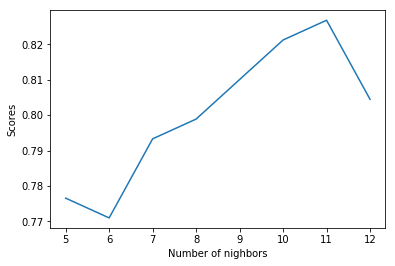

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt


StandardScaler = MinMaxScaler()
#print(train_data['Family'])

columns_to_scale = ['Deck']
train_data[columns_to_scale]=StandardScaler.fit_transform(train_data[columns_to_scale])
test_data[columns_to_scale]=StandardScaler.fit_transform(test_data[columns_to_scale])


print(train_data.head(20))




X=train_data.drop(['Survived'],axis=1)
Y=train_data['Survived']


x_train , x_test , y_train ,y_test = train_test_split(X,Y,test_size=0.2,random_state=20)

knn_scores=[]
for i in range(5,13):
  knn_classifier = KNeighborsClassifier(n_neighbors=i)
  knn_classifier.fit(x_train,y_train)
  knn_scores.append(knn_classifier.score(x_test,y_test))
   #print(cross_val_score(knn_classifier,X,Y,cv=5,scoring='accuracy'))
  #print(cross_val_score(knn_classifier,X,Y,cv=10,scoring='accuracy'))


plt.plot([k for k in range(5,13)],knn_scores)
plt.xticks([k for k in range(5,13)])
plt.xlabel("Number of nighbors")
plt.ylabel("Scores")
plt.show()




0.8212290502793296
0.8212290502793296
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
Pclass      418 non-null float64
Name        418 non-null float64
Sex         418 non-null int64
Age         418 non-null float64
SibSp       418 non-null int64
Parch       418 non-null int64
Fare        418 non-null float64
Embarked    418 non-null float64
Deck        418 non-null float64
Family      418 non-null int64
dtypes: float64(6), int64(4)
memory usage: 32.7 KB
None
           Pclass        Name         Sex  ...    Embarked        Deck      Family
count  418.000000  418.000000  418.000000  ...  418.000000  418.000000  418.000000
mean     0.632775    0.477871    0.636364  ...    0.700957    0.853725    0.839713
std      0.420919    0.195776    0.481622  ...    0.427248    0.292633    1.519072
min      0.000000    0.000000    0.000000  ...    0.000000    0.000000    0.000000
25%      0.000000    0.500000    0.000000  ...    0.500000    1.

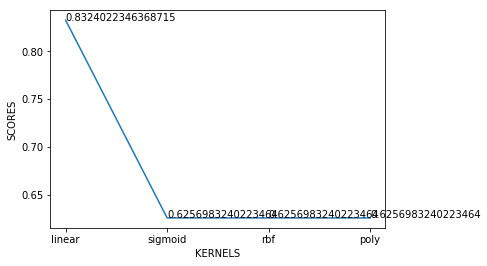

0.8100558659217877
0.8156424581005587


KeyError: ignored

In [14]:

knn_classifier = KNeighborsClassifier(n_neighbors=10)
knn_classifier.fit(x_train,y_train)
print(knn_classifier.score(x_test,y_test))
x_train.shape , test_data.shape


from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
y_pred = gnb.fit(x_train, y_train).score(x_test,y_test)
print(y_pred)
 

print(test_data.info())
print(test_data.describe())
print(train_data.info())


svc_scores=[] 
kernels = ['linear','sigmoid','rbf','poly'] 
for i in range(len(kernels)): 
  svc_classifier = SVC(kernel=kernels[i],gamma=0.001) 
  svc_classifier.fit(x_train,y_train) 
  svc_scores.append(svc_classifier.score(x_test,y_test))

plt.plot([k for k in range(len(kernels))],svc_scores)
plt.xticks([k for k in range(len(kernels))],kernels) 
plt.xlabel("KERNELS") 
plt.ylabel("SCORES") 
for i in range(len(kernels)):
  plt.text(i,svc_scores[i],svc_scores[i])

plt.show()
     
     
     
     
dt_classifier=DecisionTreeClassifier(max_features=8,random_state=0)
dt_classifier.fit(x_train,y_train)
print(dt_classifier.score(x_test,y_test))
  
rd = RandomForestClassifier(n_estimators=100 , random_state=4) 
rd.fit(x_train,y_train)
print(rd.score(x_test,y_test))

svc_classifier = SVC(kernel='rbf',gamma=0.001) 
svc_classifier.fit(x_train,y_train) 
svc_scores.append(svc_classifier.score(x_test,y_test))


predictions = svc_classifier.predict(test_data)

#print(predictions)
import numpy as np
import pandas as pd

uploaded2 = files.upload()
test=pd.read_csv(io.BytesIO(uploaded2['test.csv']))
submission = pd.DataFrame({'PassengerId':test['PassengerId'] , 'Survived':predictions})
submission.to_csv('submission.csv',index=False)
files.download('submission.csv') 
